(sympy)=
# Introducción.

Para mejorar los resultados numéricos obtenidos mediante diversas operaciones con python se puede utilizar la biblioteca de Python denominada *Sympy*. Se trata de un módulo diseñado para trabajar con matemática simbólica y de esta manera se puede decir que su objetivo es reunir todas las característica de un sistema de álgebra computacional, ser fácilmente extensible y mantener el código todo lo simple que sea posible. Además Sympy no requiere ninguna biblioteca externa, salvo para soporte gráfico.

No es el objetivo de este módulo hacer una descripción detallada de las posibilidades que ofrece Sympy, pues para ello el lector puede acudir <a href="https://www.sympy.org/en/index.html" target="_balnk"> a su web oficial </a> donde se describe con todo detalle las posibilidades que ofrece esta librería, no obstante se van a mostrar las herramientas suficientes y necesarias como para poder utilizar la librería para la consecución de los resultados que se muestran en la publicación central de este trabajo.

Comencemos con lo más básico, como es instalar la librería en python, para ello se debe ejecutar el siguiente comando:

> pip install sympy

Un vez instalado, procedemos a importar todo el paquete mediante el siguiente comando.

In [26]:
from sympy import init_session

Para presentar los resultados en un formato igual alq ue utiliza latex, se deberá ejecutar la siguiente instrucción:

In [3]:
# Para que saque resultados em latex
init_session(use_latex=True)

IPython console for SymPy 1.12 (Python 3.11.4-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



Como ya se ha dicho anteriormente, Sympy es una librería para trabajar con la matemática simbólica, y en este sentido, en lugar de obtener resultados con un montón de cifras decimales, lo que hace es presentar los resultados como los que solemos obtener cuando se trabja de una forma manual con matemáticas, y en este sentido podemos ver la diferencia de representación de resultados matemáticos en los dos ejemplos que siguen. 

In [4]:
# Resultado con matemática simbólica
from sympy import sqrt
sqrt(3)/2

In [27]:
# Resultado con matemática computacional
import numpy as np
np.sqrt(3)/2

Igualmente con Sympy se pueden simplificar expresiones como la que figura a continuación.

In [5]:
sqrt(8)

Para que Sympy entienda que queremos trabajar con notaciones simbólicas para determinadas letras, previamente las tenemos que definir.

In [6]:
from sympy import symbols
x, y = symbols('x y')
expr = x + 2*y
expr

Sympy además cuenta con determinadas facilidades que nos permiten obtener resultados matemáticos interesantes, como puede ser el cálculo de integrales (ya sean definidas o no).

In [7]:
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

Igualmente nos permite resolver ecuaciones:

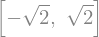

In [8]:
solve(x**2 - 2, x)

## Números complejos en Sympy.

Sympy tiene una forma bien simple par definir número complejos, para ello utiliza la letra mayúscula I para definir la parte imaginaria. Un ejemplo de esta construcción puede ser el que se muestra a continuación.

In [31]:
a = 4+3*I

print("El número complejo obtenido es el siguiente: ")

a

El número complejo obtenido es el siguiente: 


## Cálculo matricial.

Para los propósitos de este trabajo, una de las herramientas más interesantes que nos ofrece Sympy es el trabajo con matrices. Para construir una matriz en Sympy se debe utilizar el objeto *Matrix*. Veamos un ejemplo:


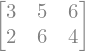

In [33]:
m = Matrix([[3,5,6],[2,6,4]])
m

Si queremos construir un vector de tipo columna, debemos facilitar como argumento una lista de valores.

In [34]:
m2 = Matrix([3,5,4,7])
m2

La matriz transpuesta se puede obtener con el método T:

In [35]:
m3 = m2.T
m3

Igualmente se pueden multiplicar matrices utilizando el símbolo "*". Veamos un ejemplo:

In [36]:
M = Matrix([[1, 2, 3], [3, 2, 1]])
N = Matrix([0, 1, 1])
print("El resultado de este producto es el siguiente:")
M*N

El resultado de este producto es el siguiente:


Con tan sólo todo este conocimiento ya estamos en condiciones de utilizar Sympy para el objetivo que perseguimos en este trabajo: hacer una representación del tipo "matemática simbólica" de los resultado obtenido dentro de la computación cuántica. En este sentido, vamos a aplicar todo esto para obtener un resultado que se ha visto en la parte teórica desarrollada.

Dentro del [apartado destinado a desarrollar el producto interno](productointerno), se ha visto el siguiente ejemplo:

$$\langle+\vert\psi\rangle=\frac{1}{\sqrt{2}}{\big(}\langle0\vert+\langle1\vert{\big)}\left(\frac{\sqrt{3}}{2}\vert0\rangle+\frac{1}{2}\vert1\rangle\right)$$

$$=\frac{1}{\sqrt{2}}\left(\frac{\sqrt{3}}{2}\underset{1}{\underbrace{\langle0|0\rangle}}+\frac{1}{2}\underset{0}{\underbrace{\langle0|1\rangle}+\frac{\sqrt{3}}{2}\underset{0}{\underbrace{\langle1|0\rangle}}}+\frac{1}{2}\underset{1}{\underbrace{\langle1|1\rangle}}\right)=$$

$$={\frac{1}{\sqrt{2}}}\left({\frac{\sqrt{3}}{2}}+{\frac{1}{2}}\right)={\frac{{\sqrt{3}}+1}{2{\sqrt{2}}}}$$

También en este apartado se ha definido un código con el que se obtenía un resultado en formato de tipo flotante, según el cual se obtiene números con una determinada cantidad de cifras decimales que se aproximan a la cifra  obtenida con notación matématica.

Entonces teniendo en cuenta cómo se opera para obtener el producto interno, y las nociones desarrolladas en este apartado, podemos obtener estos resultados en formato de matemática simbólica de la siguiente manera:

el resultado de este producto interno es el siguiente: 


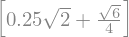

In [37]:
# defino las amplitudes del primer elemento
a= Matrix([1/sqrt(2),1/sqrt(2)])
# defino las amplitudes del segundo elemento
b= Matrix([sqrt(3)/2,1/2])
# Calculo ahora el producto interno. Tengo que transponer a para hacer un vector fila
print("el resultado de este producto interno es el siguiente: ")
a.T*b

Esta expresión se puede aún simplicar más obteniendo un resultado igual al obtenido de forma manual pero presentado de forma casi igual

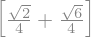

In [38]:
simplify(a.T*b)

Tener presente que operando en esta expresión llegamos al mismo resultado que el obtenido de forma manual. Resumiendo todo esto, podemos crear una función que obtenga en formato simbólico el producto interno de dos qubits.

In [39]:
#from sympy import init_session
#init_session(use_latex=True)

def productoInterno(x,y, simplificar=True):
    """ 
    Con esta función calculamos el producto interno de dos qubits

    @parámteros:
    x,y son dos mtarices de Sympy definidas como vectores columna. Estas matrices
    son la amplitudes de los qubits

    simplificar es un valor lógico que permite obtener el resultado simplificado o no.

    """

    resul = x.T*y

    if simplificar:
        resul = simplify(resul)

    return resul

Apliquemos la función anterior, para obtener el resultado buscado

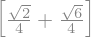

In [40]:
# defino las amplitudes del primer elemento
a= Matrix([1/sqrt(2),1/sqrt(2)])
# defino las amplitudes del segundo elemento
b= Matrix([sqrt(3)/2,1/2])

productoInterno(a,b)

## Anexo.

* <a href="https://www.youtube.com/playlist?list=PLoGFizEtm_6jCjWqRU8A-dQYQuo5q5KNc" target="_blank">Vídeos de iniciación a Sympy </a>

* <a href="https://www.youtube.com/watch?v=SNLBhyvq5O8" target="_blank">Evaluate inner product of bra and ket in Sympy Quantum </a>

* <a href="https://www.youtube.com/watch?v=OGQRcYVys1Q" target="_blank">Tutorial de SymPy: introducción y comandos básicos</a>